<a href="https://colab.research.google.com/github/AMRISMA/DataScience/blob/master/KMeansAnomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

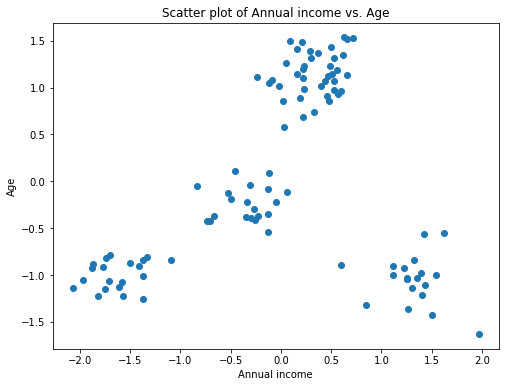

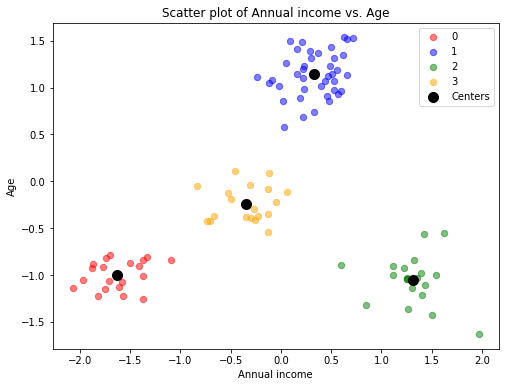

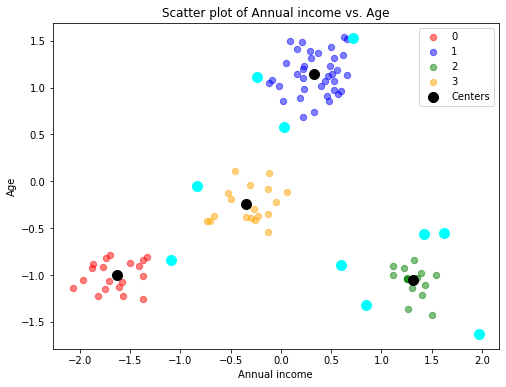

In [ ]:
# import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs


# Create sample data
features, clusters = make_blobs(n_samples = 100, n_features = 2, centers = 5, random_state=1230)
customer = pd.DataFrame(features, columns=["Income", "Age"])
customer.Income = (customer.Income + 10) * 3000 
customer.Age = customer.Age + 30 

# Standardize data
ss = StandardScaler()
customer = pd.DataFrame(ss.fit_transform(customer), columns=['Income', 'Age'])

# Data visualization
plt.figure(figsize=(8,6))
plt.scatter(customer.Income, customer.Age)
plt.xlabel('Annual income')
plt.ylabel('Age')
plt.title('Scatter plot of Annual income vs. Age')
plt.show()

# K-means clustering
km = KMeans(n_clusters=4)
model = km.fit(customer)

# Cluster visualization
colors=["red","blue","green","orange"]

# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(customer[model.labels_==i].Income, customer[model.labels_==i].Age, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Customer Data",size=20)
plt.xlabel("Annual income")
plt.ylabel("Age")
plt.title('Scatter plot of Annual income vs. Age')
plt.legend()
plt.show()

# Create new columns: label, distance
def distance_from_center(income, age, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.

    :param float income: the standardized income of the data point 
    :param float age: the standardized age of the data point 
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance  
    '''
    center_income =  model.cluster_centers_[label,0]
    center_age =  model.cluster_centers_[label,1]
    distance = np.sqrt((income - center_income) ** 2 + (age - center_age) ** 2)
    return np.round(distance, 3)
customer['label'] = model.labels_
customer['distance'] = distance_from_center(customer.Income, customer.Age, customer.label)

# Find outliers
outliers_idx = list(customer.sort_values('distance', ascending=False).head(10).index)
outliers = customer[customer.index.isin(outliers_idx)]

# Outlier visualization
# figure setting
plt.figure(figsize=(8,6))
colors=["red","blue","green","orange"]
for i in range(np.max(model.labels_)+1):
    plt.scatter(customer[model.labels_==i].Income, customer[model.labels_==i].Age, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.Income, outliers.Age, c='aqua', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering of Customer Data",size=20)
plt.xlabel("Annual income")
plt.ylabel("Age")
plt.title('Scatter plot of Annual income vs. Age')
plt.legend()
plt.show()



In [ ]:
outliers_idx = list(customer.sort_values('distance', ascending=False).head(10).index)
outliers = customer[customer.index.isin(outliers_idx)]
print(outliers)

      Income       Age  label  distance
5   0.600351 -0.896490      2     0.726
9   1.428157 -0.557522      2     0.507
26  1.967119 -1.629821      2     0.876
28 -1.091500 -0.838598      0     0.556
54  0.721616  1.524822      1     0.546
62  0.029044  0.580838      1     0.638
67 -0.829371 -0.054868      3     0.517
78 -0.232804  1.112968      1     0.564
80  0.847198 -1.316357      2     0.534
95  1.621387 -0.552568      2     0.587
